### *_Умова задачі_*

До пункту видачі надійшли вироби з такими харктеристиками:
Всього виробів - 13000 одиниць, з них виготовлено на першому заводі - 8000 од. вагою 13 кг., 
зі стандартним відхиленням по вазі 0,5 кг. На другому - 5000 од. вагою 12 кг., 
зі стандартним відхиленням по вазі 0,7 кг. Доля якісних виробів, вироблених на першому заводі, 
становить 0,85. Доля якісних виробів, вироблених на другому заводі 0,8.
Напишіть код, з використанням ЕМ-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

In [53]:
# Вихідні дані
N_1 = 8000
N_2 = 5000
N = N_1 + N_2

mu_1 = 13.0
sigma_1 = 0.5

mu_2 = 12.0
sigma_2 = 0.7



In [54]:
# Генеруємо дані
X = np.zeros((N))
np.random.seed(seed=42)
X[:N_1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N_1)
X[N_1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N_2)

In [56]:
# Створюємо мітки класів
y = np.zeros((N))
y[:N_1] = 1
y[N_1:N] = 2

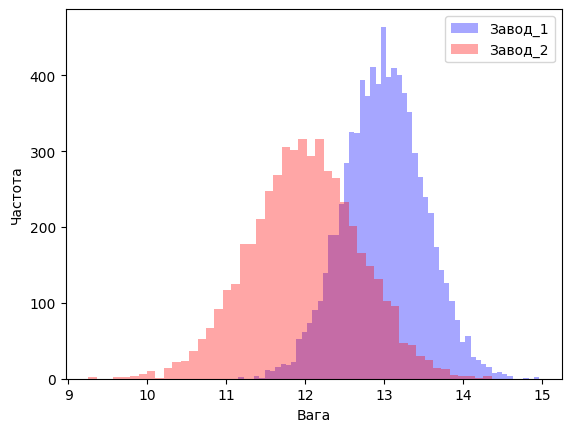

In [58]:
# Побудуємо гістограму даних
plt.hist(X[y == 1], bins='auto', color='blue', alpha=0.35, label='Завод_1')
plt.hist(X[y == 2], bins='auto', color='red', alpha=0.35, label='Завод_2')
plt.xlabel('Вага')
plt.ylabel('Частота')
plt.legend()
plt.show()

### *_Використання ЕМ-алгоритму_*

In [67]:
# Створення моделі суміші Гауса
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X.reshape(-1, 1))

GaussianMixture(n_components=2, random_state=42)

In [68]:
# Передбачення класів та розрахунок точності

In [69]:
pred_X = gmm.predict(X.reshape(-1, 1)) + 1
accuracy = accuracy_score(y, pred_X)
print('Доля вірно класифікованих обьобъектов:', round(accuracy, 3))

Доля вірно класифікованих обьобъектов: 0.824


In [70]:
# Розраховуюємо ймовірності належності об'єктів до кожного заводу
proba_X = gmm.predict_proba(X.reshape(-1, 1))
proba_factory_1 = proba_X[:, 0]
proba_factory_2 = proba_X[:, 1]

In [71]:
# Розраховуємо середні ймовірності для кожного завода
mean_proba_1 = np.mean(proba_factory_1[y == 1])
mean_proba_2 = np.mean(proba_factory_2[y == 2])
print('Средня ймовірність, що виріб  вироблено на заводі 1:', round(mean_proba_1, 3))
print('Средня ймовірність, що виріб  вироблено на заводі 2:', round(mean_proba_2, 3))

Средня ймовірність, що виріб  вироблено на заводі 1: 0.836
Средня ймовірність, що виріб  вироблено на заводі 2: 0.65


### Висновок

*_Як засвідчують отримані показники класифікація не завжди є правильною, і доля правильно класифікованих об'єктів становить 82.4%. 
    При цьому якщо вибрати випадковий виріб і провести його класифікацію, то є висока ймовірність (83.6%) того, що він був вироблений на першому заводі, і 65% ймовірність, що він був вироблений на другому заводі._*